# REGRESSÃO LOGÍSTICA BINOMIAL

## O que é?
A Regressão Logística Binominal, assim como a regressão linear, tem o objetivo de prever o comportamento de uma variável resposta (ou variável independente) a partir dos valores de variáveis dependentes. Essa técnica, porém, é aplicada quando a variável dependente é binária (0 ou 1). Para isso, cria-se um modelo que gera uma aproximação da relação entre as variáveis, resultando em parâmetros de cálculo (coeficientes) que - ao serem aplicados a determinados valores de X "variáveis independentes" - retornam a probabilidade de que a variável independente pertença a uma classe ou outra.

![Análise de Regressão](https://statplace.com.br/wp-content/uploads/2021/02/Regressao_linear-1-768x608.jpeg)

## Passo a Passo
- Passo 1: Importação das bibliotecas


In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

- Passo 2: Base de dados
- Passo 3: Tratamento dos dados
- Passo 4: `Análise de correlação` das variáveis independentes
Nota: Esse passo é importante para evitar que haja colinearidade entre as variáveis independentes, o que pode invalidar o modelo
- Passo 5: Armazenar as `variáveis dependentes em "X"` e a `variável independente em "y"` e `incluir a constante em X`

In [ ]:
# separando as variáveis X e y
X = df.[['var_ind_1', 'var_ind_2', 'var_ind_3']]
y = df['var_dependente']

In [ ]:
# adicionando a constante
X = sm.add_constant(X)

- Passo 6 `Balancear amostra`. É importante garantir que o modelo será treinado com uma amostra que disponha da mesma quantidade de observações positivas e negativas (Ex.: 50% de clientes que pagaram e 50% de clientes que não pagaram). Isso é importante para evitar que o modelo seja enviesado para a classe majoritária.


In [ ]:
# Visualizando distribuição da variável dependente
sns.countplot(x='var_dependente', data=df)
df['var_dependente'].value_counts()

In [ ]:
# balanceando as classes com undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X, y = undersample.fit_resample(X, y)

- Passo 7: `Treinar` o modelo


In [ ]:
model = sm.Logit(y, X).fit(method='newton')

- Passo 8: Gerar o sumário do modelo e `avaliar os resultados`

In [ ]:
print(model.summary())

- Passo 9: Interpretar os `parâmetros do modelo`. Quanto maior o valor do coeficiente, maior a influência da variável independente sobre a variável dependente. O valor de dos coeficientes representa a variação de `y` para o aumento, em uma unidade, no logarítmo natural da variável independente. Outra forma de se interpretar é que o exponente do coeficiente representa a variação de `y` para o aumento, em uma unidade, da variável independente.

In [ ]:
# Convertendo os coeficientes em percentuais
coef = model.params
print(((np.exp(coef)-1)*100).round(2))

- Passo 10: `Obter as previsões` aplicando o modelo sobre a amostra já balanceada (ver Passo 5)

In [ ]:
# Aplicando o modelo para prever os valores de y
y_pred = model.predict(X)
print(y_pred)

- Passo 11: Gerar as probabilidades de cada registro pertencer a cada classe e aplicar um `threshold` para classificar os registros como 0 ou 1

In [ ]:
# Atribuindo valores binários a y_pred
y_pred = y_pred.apply(lambda x: 1 if x > 0.5 else 0)
print(y_pred)

- Passo 12: Gerar a `matriz de confusão`. Essa matriz contém 4 quadrantes, que representam os valores (quantidades ou percentuais) de Verdadeiro Positivo, Falso Positivo, Verdadeiro Negativo e Falso Negativo.

In [ ]:
# Gerando a matriz de confusão e o mapa de calor
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, cmap='Blues', fmt='.2%')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

- Passo 13: Calcular as métricas de `acurácia`, `precisão`, `recall` e `f1-score`

In [ ]:
# Calculando as métricas com o classification_report
print(classification_report(y, y_pred))

- Passo 14: Gerar a curva `ROC (Receiver Operating Characteristic)` e calcular a `AUC (Area Under the Curve)`. Quanto mais próxima de 1 a área sob a curva, melhor o modelo

# Gerando o gráfico da curva ROC
logit_roc_auc = roc_auc_score(y, model.predict(X))
fpr, tpr, thresholds = roc_curve(y, model.predict(X))
plt.plot(fpr, tpr, label=f'Regressão Logística (área = {round(logit_roc_auc, 2)})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right");

- Passo 15: Adequar iterativamente o modelo até que se obtenha um resultado satisfatório

## Notas gerais

É possível converter uma variável não-binária em binária para então permitir a aplicação da regressão logística binomial (ou dicotômica). No custo, utilizamos uma função sigmóide para fazer essa conversão

In [3]:
import numpy as np

def sigmoide(x):
    return 1 / (1 + np.exp(-x))

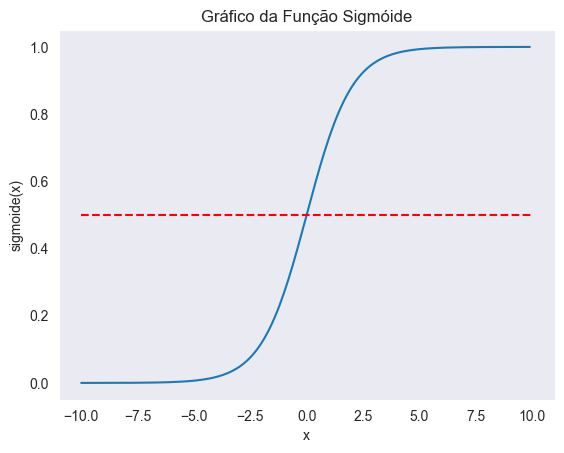

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

x = np.arange(-10,10,0.1)
sns.lineplot(x=x, y=sigmoide(x))
plt.grid()
plt.plot([-10, 10], [0.5, 0.5],'r--')
plt.xlabel('x')
plt.ylabel('sigmoide(x)')
plt.title('Gráfico da Função Sigmóide');

### Como medir a performance da regressão logística?

Em problemas de classificação binária temos 4 possibilidade:

* Verdadeiro positivo (VP): prever casos positivos corretamente;

* Verdadeiro negativo (VN): prever casos negativos corretamente;

* Falso positivo (FP): prever casos positivos incorretamente;

* Falso negativo (FN): prever casos negativos incorretamente;


Claramente, a função (ou modelo) acerta com verdadeiro positivo e verdadeiro negativo, mas erra com falso positivo e falso negativo.

Há várias formas de avaliar a performance de um modelo, e todas elas se baseiam no acertos ou erros que o modelo cometeu. Para facilitar, vamos criar uma tabela, conhecida como tabela (ou matriz) de confusão:

<table>
<thead>
  <tr>
    <th></th>
    <th colspan="2">preditos</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td rowspan="2">observados</td>
    <td>VP</td>
    <td>FN</td>
  </tr>
  <tr>
    <td>FP</td>
    <td>VN</td>
  </tr>
</tbody>
</table>

#### Métricas

* **Acurácia:** é o número total de acertos dividido pelo número total de observações. Isto é, $\frac{VP + VN}{VP + VN + FP + FN}$

* **Valores Positivos Preditos ou Precision:** é o número de verdadeiro positivos dividido pelo total de positivos observados. Isto é, $\frac{VP}{VP + FP}$

* **Valores Negativos Preditos:** é o número de verdadeiro negativos dividido pelo total de negativos observados. Isto é, $\frac{VN}{VN + FN}$

* **Sensitividade ou Recall:** é o número de verdadeiro positivos dividido pelo total de verdadeiros preditos. Isto é, $\frac{VP}{VP + FN}$

* **Especificidade:** é o número de verdadeiro negativos dividido pelo total de negativos preditos. Isto é, $\frac{VN}{VN+FP}$.

* **f1-score:** é uma média harmônica entre sensitividade e especificidade.


Podemos montar a matriz de confusão usando a função `confusion_matrix` do módulo `metrics` do `scikit-learn`.

# REGRESSÃO LOGÍSTICA MULTINOMIAL